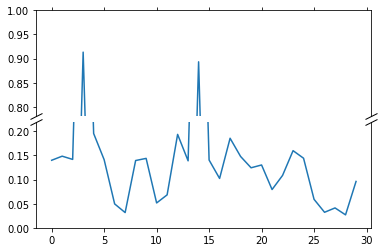

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

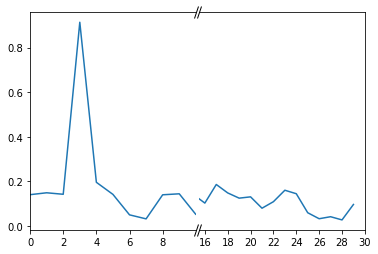

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0.02)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0, 10)  # outliers only
ax2.set_xlim(15.5, 30)  # most of the data

# hide the spines between ax and ax2
ax1.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
#ax1.xaxis.tick_top()
ax2.tick_params(left=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.set_xticks([0,2,4,6,8])
ax2.set_xticks([16,18,20,22,24,26,28,30])

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = 3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)


plt.show()

In [27]:
import functools

def the_caller(callers, attr, *args, **kwargs):
    result = []
    for c in callers:
        result.append(getattr(c, attr)(*args, **kwargs))
    return result

class my_multicall:
    def __init__(self, callers):
        self.callers = callers
    
    def __getattr__(self, attr):
        if attr in self.__class__.__dict__:
            return getattr(self, attr)
        else:
            
            return functools.partial(the_caller, self.callers, attr)

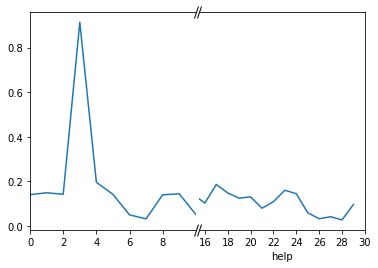

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0.02)  # adjust space between axes

# plot the same data on both axes
both_axes = my_multicall([ax1, ax2])
both_axes.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0, 10)  # outliers only
ax2.set_xlim(15.5, 30)  # most of the data

# hide the spines between ax and ax2
ax1.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
#ax1.xaxis.tick_top()
ax2.tick_params(left=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.set_xticks([0,2,4,6,8])
ax2.set_xticks([16,18,20,22,24,26,28,30])
ax2.set_xlabel("help")

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = 3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)


plt.show()

In [30]:
from brokenaxes import brokenaxes

Text(0, 0.5, 'value')

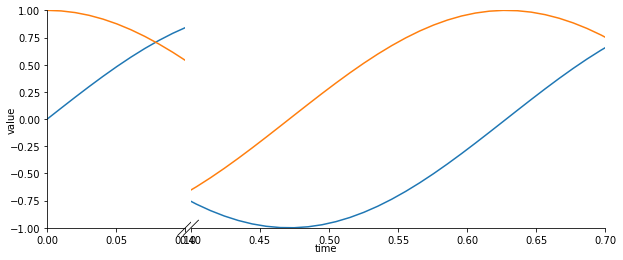

In [36]:

fig = plt.figure(figsize=(10, 4))
bax = brokenaxes(xlims=((0, .1), (.4, .7)), ylims=[(-1, 1)], hspace=.05, wspace=0.02)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(10 * x), label='sin')
bax.plot(x, np.cos(10 * x), label='cos')
#bax.legend(loc=3)
bax.set_xlabel('time')
bax.set_ylabel('value')
